In [30]:
import pandas as pd
data = pd.read_csv("/content/2357.TW.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,273.5,274.0,269.0,270.0,180.993896,1300586
1,2017-12-04,270.0,271.0,267.5,269.0,180.323547,992636
2,2017-12-05,269.0,269.0,267.5,268.5,179.988373,1018041
3,2017-12-06,270.5,270.5,266.5,269.5,180.658722,1181673
4,2017-12-07,269.5,269.5,265.0,265.0,177.642166,934593


In [31]:
data['Date'] =pd.to_datetime(data['Date'])
data.index= data['Date']

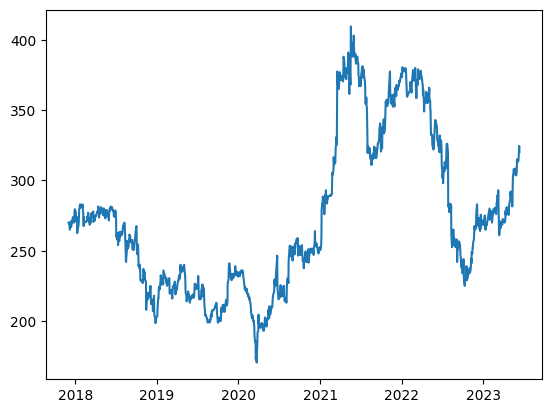

In [32]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['Close'])

In [33]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [34]:
# 2. Đọc file dữ liệu chứng khoán DELL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/2357.TW.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index



# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3607.840, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3599.937, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3601.877, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3601.876, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3597.992, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.875 seconds


In [37]:
train_data.index

RangeIndex(start=0, stop=671, step=1)

In [38]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [39]:

from datetime import timedelta

In [40]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
#last_index =  df.index[-1]
last_index=len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5
 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5 248.5
 248.5 248.5 248.5 248.5 248.5 248.5]


In [41]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 44.648400079170024
Testing RMSE: 96.72617078344341


RMSE thường được sử dụng để đánh giá độ chính xác của mô hình dự đoán với các giá trị liên tục, như giá cổ phiếu, điểm số, nhiệt độ, v.v. Giá trị RMSE càng nhỏ, mô hình dự đoán càng chính xác. Vậy với dữ liệu này mô hình Arima chính xác hơn

Validation RMSE: 44.648400079170024
Testing RMSE: 96.72617078344341
Validation MAE: 35.87777777777778
Testing MAE: 83.42661691542288
Validation MAPE: 0.11968909981968694
Testing MAPE: 0.23282539501762628


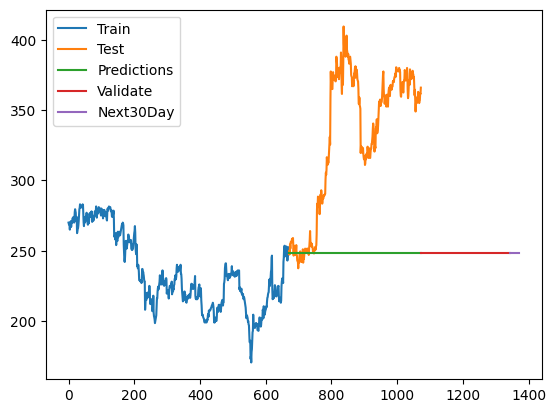

In [42]:


# 8. Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mae= np.mean(np.abs(y_pred_val - y_val))
test_mae= np.mean(np.abs(y_pred - y_test))
valid_mape= np.mean(np.abs((y_pred_val - y_val) / y_val))
test_mape= np.mean(np.abs((y_pred - y_test) /y_test))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [43]:
test_data.index

RangeIndex(start=671, stop=1073, step=1)